In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [43]:
data = pd.read_csv('./datasets/linear_data_train.csv', header=None)

In [44]:
data_x = np.array(data.iloc[:, 1:])
labels = np.reshape(np.array(data.iloc[:,0]), [-1,1])

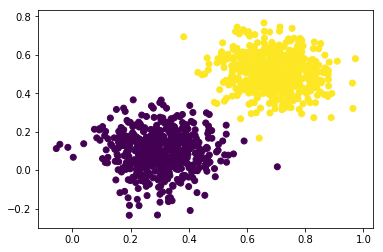

In [45]:
plt.scatter(data_x[:,0], data_x[:,1], c=data.iloc[:,0])  #can't use labels as we need(1000,) shaped array

In [46]:
#hyperparams
epochs = 100
batch_size = 100
num_batch = data_x.shape[0]//batch_size

In [47]:
tf.reset_default_graph()

In [48]:
#vars and placeholders
x = tf.placeholder(tf.float32, [None, 2], name='x')
y = tf.placeholder(tf.float32, [None, 1], name = 'y')

w_1 = tf.Variable(tf.random_normal([2, 10], stddev=0.1), name='w_1')
b_1 = tf.Variable(tf.zeros([10]), name='b_1')

w_2 = tf.Variable(tf.random_normal([10,1], stddev=0.1), name='w_2')
b_2 = tf.Variable(tf.zeros([1]), name='b_2')

In [49]:
#neural net
y1 = tf.nn.tanh(tf.matmul(x, w_1) + b_1)
logit = tf.matmul(y1, w_2) + b_2
y2 = tf.nn.sigmoid(logit)

In [50]:
#loss and train
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=logit))

train = tf.train.AdamOptimizer().minimize(loss)

In [51]:
sess = tf.Session()

In [52]:
sess.run(tf.global_variables_initializer())

In [53]:
#training

for i in range(epochs):
    ptr = 0
    for j in range(num_batch):
        train_x = data_x[ptr: ptr+batch_size]
        train_y = labels[ptr: ptr+batch_size]
        
        curr_loss, _ = sess.run([loss, train], feed_dict={x: train_x, y: train_y})
    
    if(i%10 == 0):
        print('Loss:')
        print(curr_loss)

Loss:
0.696895
Loss:
0.646106
Loss:
0.545623
Loss:
0.412143
Loss:
0.290248
Loss:
0.203016
Loss:
0.146514
Loss:
0.110121
Loss:
0.0858912
Loss:
0.0690702


In [54]:
#eval starts
data_test = pd.read_csv('./datasets/linear_data_eval.csv', header=None)

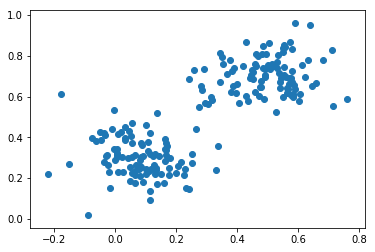

In [55]:
plt.scatter(data_test[2], data_test[1])

In [56]:
predictions = sess.run(y2, feed_dict={x: np.array(data_test.iloc[:, 1:])})

In [59]:
predictions[predictions>= 0.5] = 1
predictions[predictions< 0.5] = 0

In [78]:
error = np.sum(np.abs(predictions - np.array(data_test.iloc[:,0]).reshape(-1,1)))/data_test.shape[0]

In [79]:
print(error)

0.0


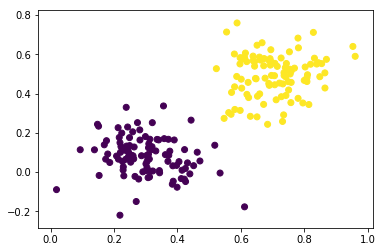

In [81]:
#plotting based on our predictions
plt.scatter(data_test.iloc[:,1], data_test.iloc[:,2], c=data_test.iloc[:,0])